### Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

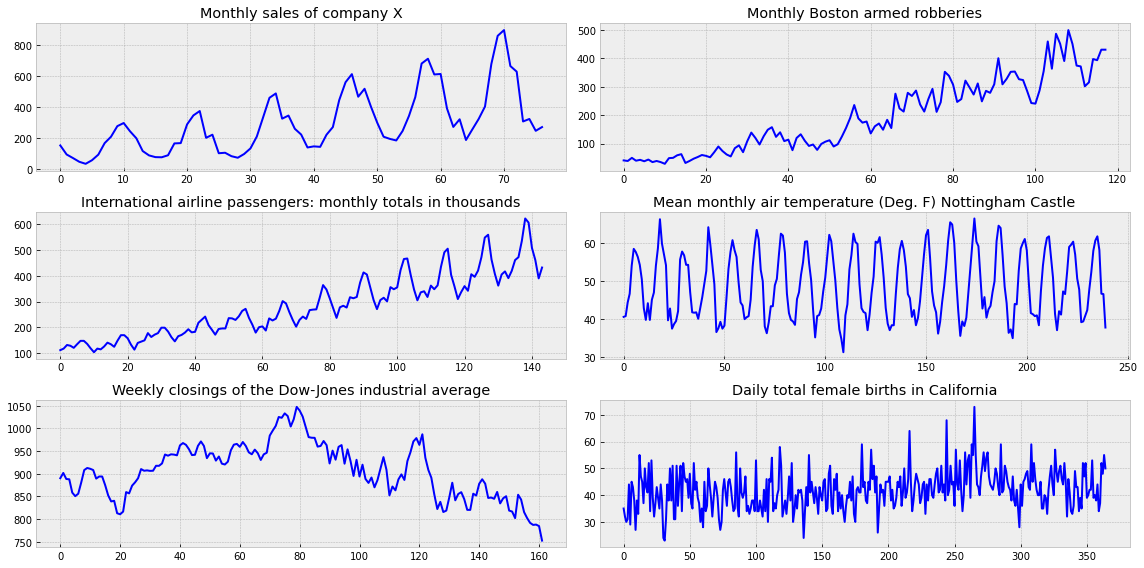

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [9]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

from scipy.stats import boxcox

### Вспомогательные функции

In [15]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [10]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [20]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

#         y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.plot(y, color='blue',label='original')
        ts_ax.plot(moving_average(y, 40), color='red', linewidth='4', label='Moving Average')
        ts_ax.legend()
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [22]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

#### 1. Месячные продажи компании Х

In [31]:
series = all_series["Monthly sales of company X"]

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


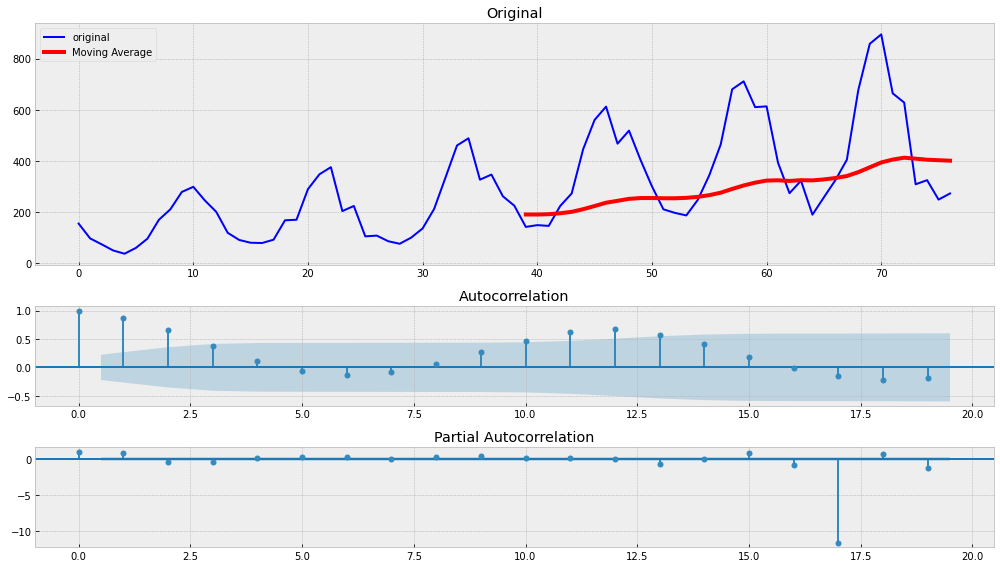

In [32]:
tsplot(series)

Тест Дики-Фуллера не отвергает гипотезу о нестацианорности, p-value высоко (=0.988). На графике ряда явно видна сезонность, постепенное увеличение амплитуды, так же прослеживается наличие тренда (отображение скользящего среднего с большим окном по ряду показывает примерный тренд).

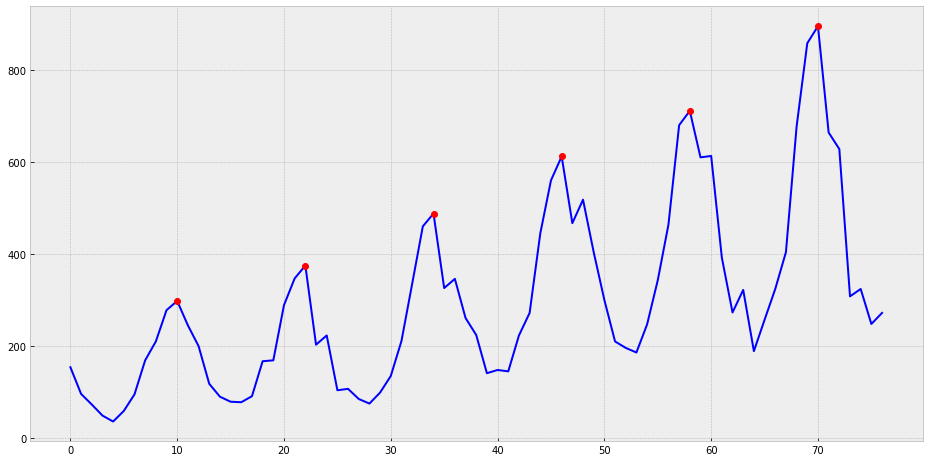

In [28]:
plot_ts_and_points(series, 10, 12)

1 сезонный цикл - 12 месяцев

In [33]:
# убираем изменение дисперсии
series = boxcox(series, 0)
# убираем тренд дифференцированием
series = np.diff(series, 1)
# убираем сезонность
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


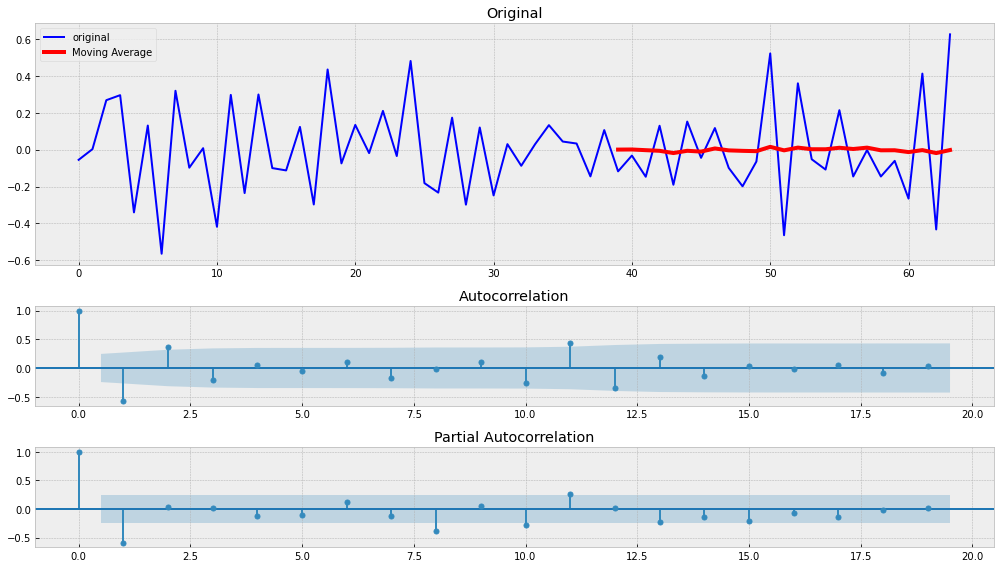

In [34]:
tsplot(series)

По графику видно, что тренд и сезонность больше не прослеживаются. Однако значение p-value пока заметно больше стандартного p=0.05, которое позволяло бы отвергнуть гипотезу о нестационарности.

Попробуем еще одно преобразование, повторно дифференцируем ряд 

In [35]:
series_diff = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


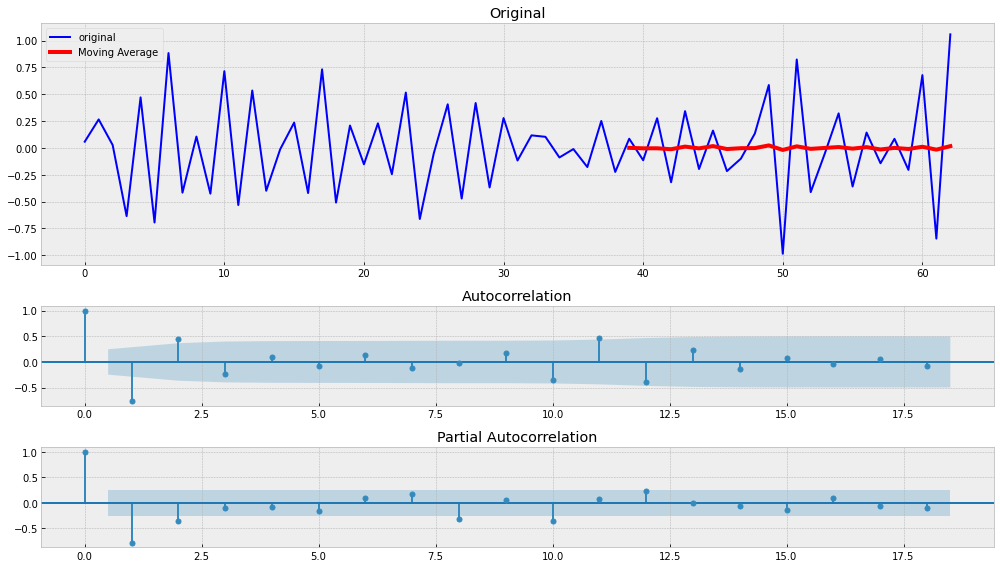

In [36]:
tsplot(series_diff)

Теперь p-value < 0.05, значения на кореллограммах почти все попадают  доверительный интервал. Можем отвергнуть гипотезу о нестационарности ряда

#### 2. Ежедневное количество родившихся девочек в Калифорнии 

In [37]:
series =  all_series["Daily total female births in California"]

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


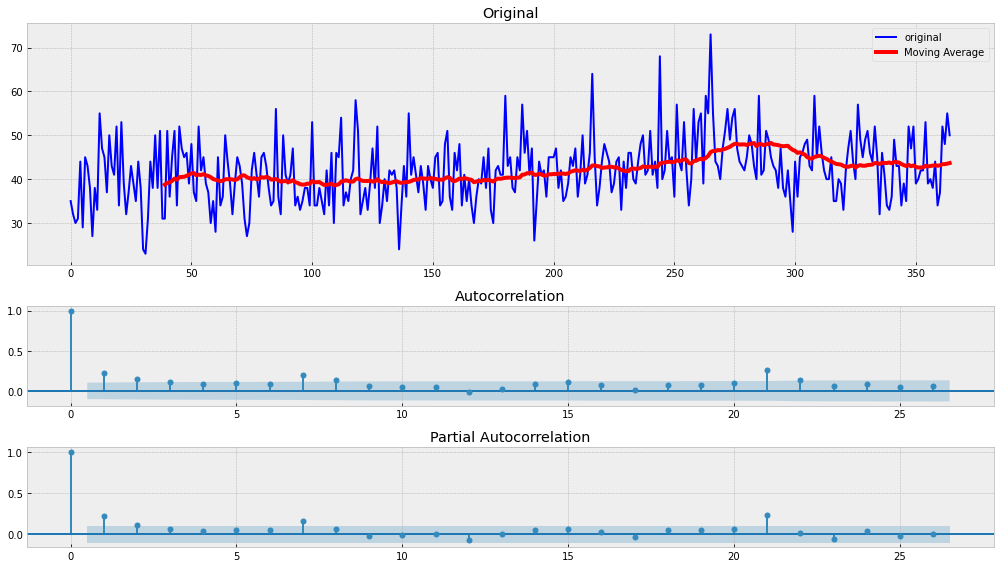

In [38]:
tsplot(series)

По тесту Дики-Фуллера получаем изначально низкое значение p-value (0.000052), позволяющее отвергнуть гипотезу о нестационарности ряда. Явного тренда здесь так же не наблюдаем. Условно можно выделить участки, на которых есть растущий и убывающий тренды, но они невелики относительно всего ряда и вряд ли критичны. Какой-то очевидной сезонности тоже нет. Вывод: этот ряд можно признать стационарным без преобразований

#### 3. Индекс Доу-Джонса

In [44]:
series = all_series["Weekly closings of the Dow-Jones industrial average"]

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


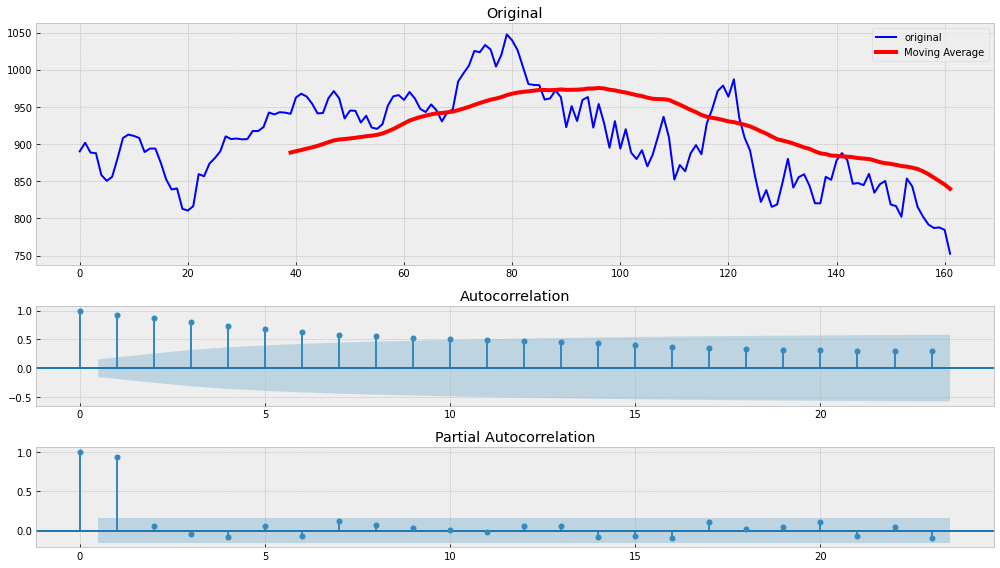

In [45]:
tsplot(series)

Тест Дики-Фуллера не позволяет отвергнуть гипотезу о нестационарности ряда. Единого тренда нет, однако можно условно разбить имеющиеся данные на 2 участка: с возрастающим трендом (примерно до отметки 80) и с убывающим (после 80). Явной сезонности не наблюдаем 

In [50]:
series_upd = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


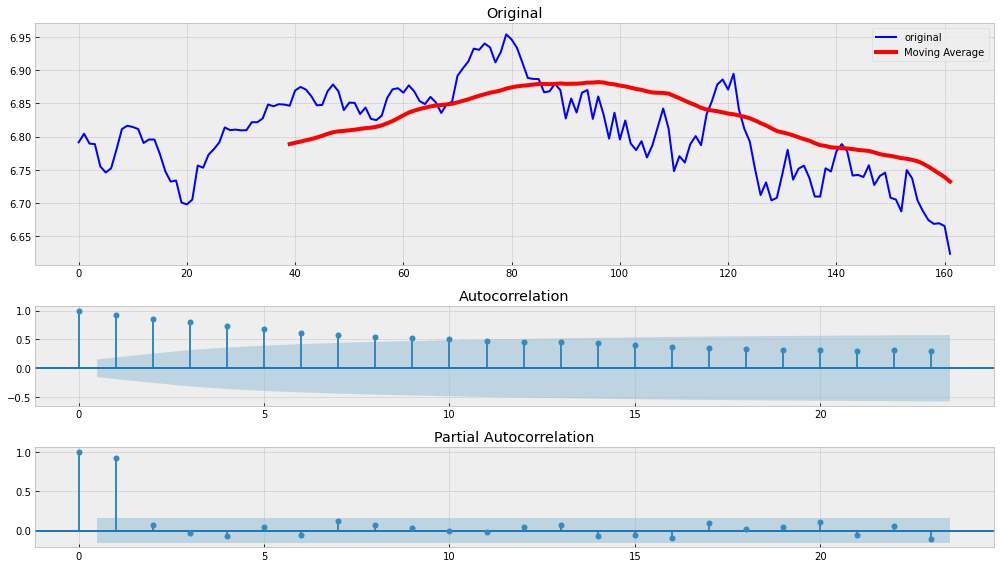

In [51]:
tsplot(series_upd)

In [52]:
series_upd = np.diff(series_upd, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


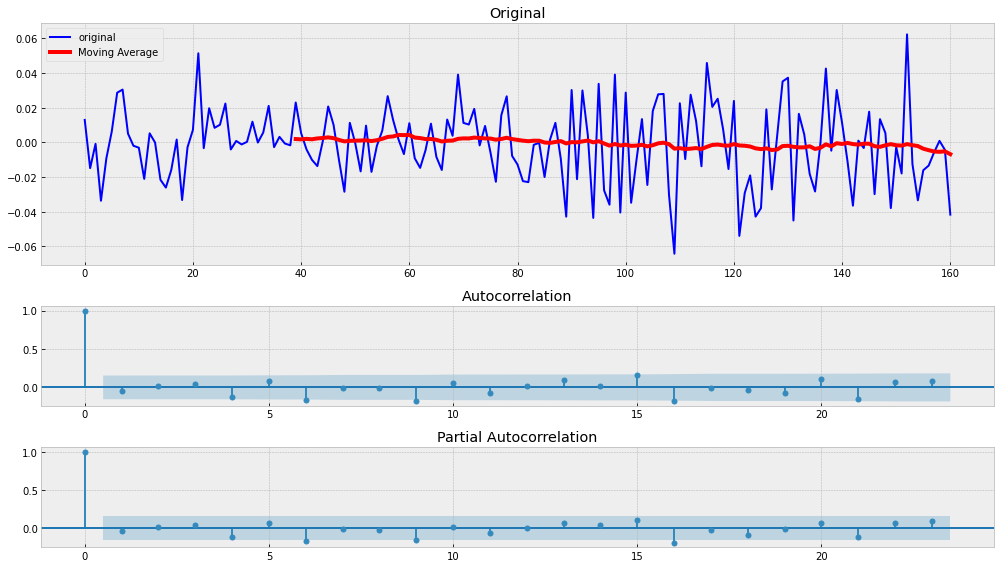

In [53]:
tsplot(series_upd)

Обычное дифференцирование позволяет избавиться от тренда. И p-value сразу падает до значеия, очень близкого к 0 (2.751609e-24). Считаем, что ряд приведен к стационарному виду.